**Proyek Akhir : Klasifikasi Gambar**

---



Perkenalkan saya Zain, berikut proyek akhir saya di kelas "Belajar Machine Learning untuk Pemula"

Nama     : Muhammad Rafii Zain

username : rafiizain

email    : rafiizainmuhamamad@gmail.com

No. telp : +6281222306699

Domisili : Tangerang Selatan

TTL      : Jakarta Timur, 28 Juni 1999

Profesi  : Mahasiswa


In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

mendownload dataset menggunakan wget command

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-11 10:49:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.58MB/s    in 5m 38s  

2021-05-11 10:54:43 (933 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



mengekstrak file kedalam folder images

In [16]:
import zipfile,os
zip_file = '/tmp/rockpaperscissors.zip'
extract_file = zipfile.ZipFile(zip_file, 'r')
extract_file.extractall('/images')
extract_file.close()

membuat folder dan mengatur lokasinya

In [17]:
base_dir = '/images/rockpaperscissors/rps-cv-images'
rock_dir = os.path.join('/images/rockpaperscissors/rps-cv-images/rock')
paper_dir = os.path.join('/images/rockpaperscissors/rps-cv-images/paper')
scissors_dir = os.path.join('/images/rockpaperscissors/rps-cv-images/scissors')

menggunakan ImageDataGenerator untuk training dan testing

melakukan process preprocessing dan augmentasi gambar

serta menggunakan perbanding data training 60% dan data validasi 40% dari total dataset

In [7]:
from keras.preprocessing import image

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)

val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)

menggunakan data dari ImageDataGenerator untuk dipelajari model

In [22]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size = (150, 150), 
        batch_size = 16,
        class_mode ='categorical',
        shuffle = True,
        subset = 'training')

validation_generator = val_datagen.flow_from_directory(
        base_dir, 
        target_size = (150, 150), 
        batch_size = 16, 
        class_mode = 'categorical',
        shuffle = False,
        subset = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


dari data diatas didapat data training berjumlah 1314 data dan data validasi berjumlah 874 yang masing masing memenuhi kriteria 3 kelas 

membuat model sequential 

In [23]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (150,150,3)),
     tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     tf.keras.layers.Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     tf.keras.layers.Conv2D(256, (3,3), strides = (1,1), activation = 'relu' ),
     tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dropout(0.2),   
     tf.keras.layers.Dense(128, activation = 'relu'),
     tf.keras.layers.Dense(3, activation='softmax')
])

menggunakan penjadwalan learning rate dan callback

In [24]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs',
    histogram_freq=0, 
    update_freq='epoch', 
    embeddings_freq=0,
    embeddings_metadata=None
)


menampilan model summary
dan menggunakan optimizer yaitu adam optimizer


In [25]:
model.summary()

tf.optimizers.Adam(learning_rate=0.0005, name='Adam')
model.compile(loss = 'categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

batch_size = 16
history = model.fit(train_generator, 
                    epochs =  10, 
                    steps_per_epoch = 1314//batch_size, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps = 874//batch_size,
                    callbacks =[lr_schedule, tb_callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

menampilkan plot training accuracy dan validation accuracy terhadap masing masing epoch

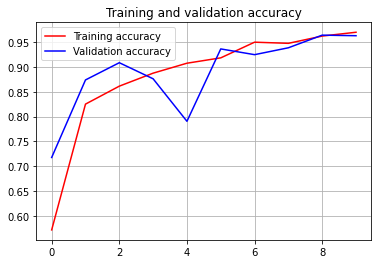

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.grid()
plt.figure()


plt.show()

In [ ]:
mengupload gambar dan memprediksi hasilnya

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K (4).png
0a3UtNzl5Ll3sq8K.png

hasil prediksi:

PAPER


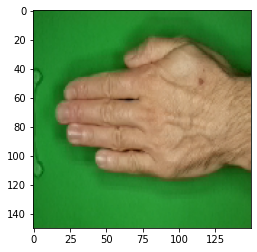

In [35]:
import numpy as np
from google.colab import files
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgshow = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(fn)
  print('\nhasil prediksi:\n')
  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  else:
    print('SCISSORS')

mengupload gambar dan memprediksi hasilnya

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png
0bioBZYFCXqJIulm.png

hasil prediksi:

ROCK


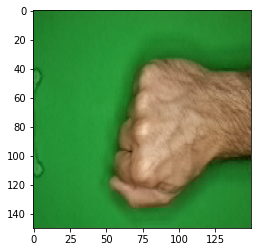

In [36]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgshow = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(fn)
  print('\nhasil prediksi:\n')
  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  else:
    print('SCISSORS')

mengupload gambar dan memprediksi hasilnya

Saving 1L1n6plr7jlZGirw.png to 1L1n6plr7jlZGirw.png
1L1n6plr7jlZGirw.png

hasil prediksi:

SCISSORS


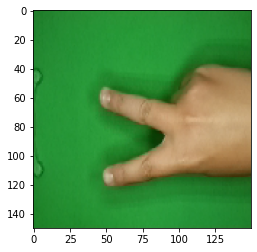

In [37]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgshow = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(fn)
  print('\nhasil prediksi:\n')
  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  else:
    print('SCISSORS')